# Imports etc.

In [8]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
with open('../Data/tweet_df_attempt3.p', 'rb') as f:
    data = pickle.load(f)
len(data)

15064

In [ ]:
s_tweets = data['full_text'].drop_duplicates() # remove duplicates
s_tweets = s_tweets[~s_tweets.str.contains('RT')] # remove retweets

len(s_tweets)

9930

In [ ]:
# Define RegEx patterns for cleaning
twitter_pattern = r'@[a-zA-Z0-9_]{1,16}'                 # Remove twitter handles
retweet_pattern = r'RT'                                  # Remove retweet indicators
short_URL_pattern = r'https:\/\/t\.co\/[a-zA-Z0-9\-\.]+' # Remove shortened "https://t.co/..." Twitter URLs
other_URL_pattern = r'https:\/\/[A-z0-9?\.\/-_=!]+'      # Remove other URLs

pattern_list = [
    twitter_pattern,
    retweet_pattern,
    short_URL_pattern,
    other_URL_pattern
    ]

# Apply patterns
for pattern in pattern_list:
    s_tweets = s_tweets.str.replace(pattern, '', regex = True)

In [ ]:
tweets_list = s_tweets.tolist()

In [ ]:
counter = 0

for el in tweets_list:
    if "environment" in el.lower():
        print(el)
        print("___________________________")
        counter = counter + 1

print(counter)

Article in Korean explicitly mention the influence of EU decision quoting Ministry of Environment – “Considering international trends and domestic conditions, nuclear power generation can be included.”

Thanks to the Commission 😡

#VoteThisTaxonomyDown


___________________________
Past #nuclear tests continue to impact people &amp; environment, including #Algeria. 
On Monday my colleague  will hold a webinar with experts, diplomats, civil society, MPs on the role of the #EU regarding victims and the environment. Join him!  
___________________________
🇬🇧|Environment Minister  can imagine #Germany joining #Austria &amp; #Luxembourg's lawsuit against #EU #taxonomy. In doing so, she is standing in the way of a secure energy supply. #ID #nuclear power 
___________________________
🇬🇧|According to Environment Minister , the German government will take a clear position at the  against their proposal to classify #nuclear power as sustainable in the #EU. #Blackout &amp; expensive prices appare

# Dictionary development

In [3]:
# preliminary topics and dictionaries
taxonomy = ["taxonomy"]
anti_taxonomy = ["taxonomy" AND ("exclud" OR "greenwash")]

climate = ["climate", "renewable", "solar", "wind", "sutsainable", "sustainability"]	

russian_invasion = ["russia","russian", "ukraine", "ukrainian", "invasion", "zaporizhzhia"]

monetary_arguments = ["cheap"]	
other_arguments = ["toxic", "radioactive"] 

In [4]:
with open('../Data/nuclear2vec_terms.p', 'rb') as f:
    nuclear2vec_terms = pickle.load(f)
    
nuclear2vec_terms # should be reconfigured into categories that make more sense

{'environment': {'eugreendeal', 'green_investment', 'sustainable_investment'},
 'eu': {'decarbonisation', 'energytransition', 'nuclearpower'},
 'sustainable': {'netzero',
  'radiation',
  'sustainable_finance',
  'sustainablefinance'},
 'nuclearpower': {'renewables'},
 'taxonomy': {'mairead', 'meps', 'stopfakegreen'},
 'lobby': {'chairman', 'leyen', 'sustainablefinanceeu'},
 'europeancommission': {'nuclear_waste', 'radioactive_waste'},
 'ukrainerussiawar': {'geopolitical', 'russia'},
 'nuclearindustry': {'iaeagc', 'netzeroneedsnuclear'},
 'rethinknuclear': {'research_reactor', 'waste'}}

In [ ]:
# Manually reconfigured dictionary -- some can be expanded; some collapsed etc.
custom_terms = { 
    'sustainable_nuclear': {
        'netzeroneedsnuclear',
        'rethinknuclear',
        'cleanpower',
        'clean_power',
        'clean_electricity',
        'cleanelectricity',
        'kwh',
        'standupfornuclear',
        'justtransition',
        'wecare'
        },
    'eu_green_deal': {
        'green_deal',
        'greendeal'
        },
    'eu_taxonomy': {
        'taxonomy',
        'eugreentaxonomy',
        'classif'
        },
    'energy_transition': {
        'transition',
        'decarbon',
        'de-carbon',
        'energiewende'
        },
    'sustainable_finance': {
        'sustainable_finance',
        'sustainablefinance',
        'sustainable_investment',
        'green_investment',
        'financingchange'
        },
    'greenwashing': {
        'greenwash',
        'stopfakegreen',
        'notourtaxonomy',
        'taxonomywashing',
        'dontpaintitgreen',
        'credib',
        'nuclear_out',
        'nuclearout'
        },
    'other_renewables': {
        'solar',
        'wind'
        },
    'climate': {
        'climate'
        },
    'eu_commission': {
        'ursula',
        'leyen',
        'commission'
        },
    'eu_parliament': {
        'mep',
        'europeanparliament',
        'euparliament',
        'europarl',
        '#ep'
        },
    'nuclear_risks': {
        'nuclear_waste',
        'radiat',
        'radioactive',
        'chernobyl',
        'fukushima'
        },
    'ukraine_russia': {
        'geopolitic',
        'russia',
        'ukrain',
        'war',
        'inva',
        'zaporizhzhia',
        'conclict',
        'dependen',
        'siege',
        'donbass',
        'luhansk',
        'donetsk',
        'bomb'
        },
    'nuclear_industry_investment': {
        '#uranium',
        '$ura',
        'market',
        'stocks',
        'iaea'
        },
    'expert_opinion': {
        'expert',
        'advis'
        },
    'call_to_action': {
        'petition',
        'sign',
        'letter'
        },
    'oil_gas': {
        'oil',
        'gas',
        'fossil'
        },
    'iran_or_irrelevant': {
        'iran',
        'tehran',
        'assad',
        'syria',
        'nuclearmedicine',
        'nuclear_medicine'
        }
    }

In [11]:
# Attempt to collapse into fewer, broader categories
# in order to ease interpretatbility and benchmarking
# against manual coding

custom_terms_v2 = { 
    'sustainable_nuclear': {
        'netzeroneedsnuclear',
        'nuclearfornetzero',
        'rethinknuclear',
        'cleanpower',
        'clean_power',
        'clean_electricity',
        'cleanelectricity',
        'kwh',
        'standupfornuclear',
        'justtransition',
        'wecare',
        'gen4',
        'salt',
        'thorium',
        'nuclearsociety',
        'flexib',
        'yestonuclear'
        },
    'eu_taxonomy_green_deal': {
        'taxonomy',
        'eugreentaxonomy',
        'classif',
        'green_deal',
        'greendeal'
        },
    'energy_transition': {
        'transition',
        'decarbon',
        'de-carbon',
        'energiewende',
        'climate',
        'carbon-free',
        'carbon_free',
        'carbon-neutral',
        'low_carbon',
        'lowcarbon',
        'low-carbon',
        'post-carbon',
        'netzero',
        'co2',
        'ghg',
        'greenhouse',
        'emission',
        'renewable',
        'warming'
        },
    'finance_energy_crisis': {
        'sustainable_finance',
        'sustainablefinance',
        'sustainable_investment',
        'green_investment',
        'price',
        'cheap',
        'economics',
        'energycrisis',
        'energy_crisis',
        'energy_prices',
        'moneyforchange'
        },
    'greenwashing': {
        'greenwash',
        'stopfakegreen',
        'notourtaxonomy',
        'dontpaintitgreen',
        'credib',
        'nuclear_out',
        'nuclearout'
        },
    'eu_entities': {
        'ursula',
        'leyen',
        'commission',
        'mep',
        'europeanparliament',
        'euparliament',
        'europarl',
        'european_parliament',
        'eu_parliament',
        '#ep',
        'greens',
        '🇪🇺'
        },
    'nuclear_risks_regulations': {
        'nuclear_waste',
        'radiat',
        'radioactive',
        'fukushima',
        'accident',
        'unsafe',
        'safety_problem',
        'regulat',
        'meltdown',
        'rbmk',
        'nuclear_security',
        'nuclear_safety'
        },
    'ukraine_russia': {
        'geopolitic',
        'geo-politic',
        'russia',
        'ukrain',
        'inva',
        'zaporizhzhia',
        'conflict',
        'dependen',
        'putin',
        'zelensky',
        'siege',
        'donbass',
        'luhansk',
        'donetsk',
        'bomb',
        'nordstream'
        },
    'investment_and_industry': {
        '#uranium',
        '$ura',
        'market',
        'stocks',
        'iaea',
        'investor',
        'reactor',
        'euratom',
        'foratom',
        'industr',
        'framatome',
        'romatom',
        'nuclear_innovation'
        },
    'expert_opinion': {
        'expert',
        'advis'
        },
    'activism_calls_to_action': {
        'petition',
        'sign',
        'letter',
        'protest',
        'nonuclear',
        'poll'
        },
    'other_energy_sources': {
        'oil',
        'gas',
        'coal',
        'fossil',
        'solar',
        'wind'
        },
    'member_states': {
        'member_states',
        'brexit',
        'britain',
        'british',
        'austria',
        'belgi',
        'bulgaria',
        'croatia',
        'cypr',
        'czech',
        'denmark',
        'danish',
        'estonia',
        'finland',
        'finnish',
        'france',
        'french',
        'german',
        'greece',
        'greek',
        'hungar',
        'ireland',
        'irish',
        'italy',
        'italian'
        'latvia',
        'lithuania',
        'luxembourg',
        'malta',
        'maltese'
        'netherlands',
        'dutch',
        'poland',
        'polish',
        'portugal',
        'portuguese',
        'romania',
        'slovakia',
        'slovenia',
        'spain',
        'spanish',
        'swed'
    },
    'irrelevant': {
        'iran',
        'tehran',
        'syria',
        'nuclearmedicine',
        'nuclear_medicine',
        'terro',
        'cancer',
        ' arms',
        'weapon',
        'arsenal'
        }
    }

In [22]:
sum([len(terms) for terms in custom_terms_v2.values()])

176

# Classification

In [ ]:
def classify_tweet(tweet, classification_dict):
    '''
    Dictionary-based classification. Applies
    (multiple) predefined labels to a given
    tweet, returning a dictionary of dummies
    (category present/not present).
    '''

    # Initialise variables for holding 1) labels found
    # and 2) dummies/counts of categories attributed to
    # a given tweet
    labels_found = set() # change to list and .append() if multiple counts are desired
    label_dict = dict.fromkeys(classification_dict, 0)
    
    # Check if a given query term is in the tweet,
    # adding to set of found labels
    for key, vals in classification_dict.items():
        for val in vals:
            if val.replace('_', ' ') in tweet.lower():
                labels_found.add(key)

    # Increment dummy/count by one for each category
    # for which on or more query terms were present
    # in the tweet
    for label in labels_found:
        label_dict[label] += 1

    return label_dict

In [ ]:
# Test: classify mock tweet
classify_tweet(
    '''
    in spite of the war in ukraine,
    von der leyen has said that nuclear
    power is a sustainable, low-carbon
    investment, compared to oil
    #dontpaintitgreen
    ''',
    custom_terms_v2
    )

{'sustainable_nuclear': 0,
 'eu_taxonomy_green_deal': 0,
 'energy_transition': 1,
 'finance_energy_crisis': 0,
 'greenwashing': 1,
 'eu_entities': 1,
 'nuclear_risks_regulations': 0,
 'ukraine_russia': 1,
 'investment_and_industry': 0,
 'expert_opinion': 0,
 'activism_calls_to_action': 0,
 'other_energy_sources': 1,
 'member_states': 0,
 'irrelevant': 0}

In [ ]:
# Classify each tweet using custom function,
# return dict of classified tweets
classified_dict = {tweet: classify_tweet(tweet, custom_terms_v2) for tweet in tweets_list}

# Convert classified tweets to DF for ease
# of analysis/export
df_classified = (
    pd.DataFrame
        .from_dict(classified_dict, orient = 'index')
        .reset_index()
        .rename(columns = {'index':'tweet'})
    )

# Quick glimpse
df_classified.head()

,tweet,sustainable_nuclear,eu_taxonomy_green_deal,energy_transition,finance_energy_crisis,greenwashing,eu_entities,nuclear_risks_regulations,ukraine_russia,investment_and_industry,expert_opinion,activism_calls_to_action,other_energy_sources,member_states,irrelevant
0,Congratulations to Rutte &amp; his 4th govern...,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,Ahead of the V4-France Summit I talked to on ...,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,“The only way to achieve energy independence i...,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,Swedish MEP has written in this week about t...,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,#ECPM MEP points out important omissions in t...,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
df_classified.loc[df_classified['ukraine_russia'] == 1, ['tweet']].head()

,tweet
2,“The only way to achieve energy independence i...
8,Ok - I asked here how we could replace Russian...
9,European Parliament just voted for a full and ...
11,During ⁦⁩ visit to the #CzechRepublic (startin...
34,The time for immediate further sanctions - emb...


In [ ]:
df_classified['unclassified'] = 0

df_classified.loc[df_classified.sum(axis = 1, numeric_only = True) == 0, ['unclassified']] = 1

In [ ]:
topic_dist = df_classified.sum(numeric_only = True).sort_values(ascending = True)
topic_dist

sustainable_nuclear           271
expert_opinion                285
greenwashing                  372
irrelevant                    389
activism_calls_to_action      599
nuclear_risks_regulations     602
finance_energy_crisis        1013
unclassified                 1119
eu_entities                  1312
ukraine_russia               1520
eu_taxonomy_green_deal       1919
investment_and_industry      2204
energy_transition            2380
member_states                2487
other_energy_sources         2795
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

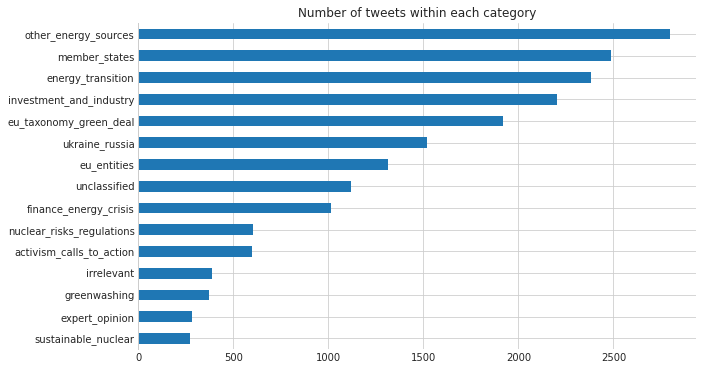

In [ ]:
plt.figure(figsize = (10,6))
topic_dist.plot(kind = 'barh')
plt.title('Number of tweets within each category')
sns.despine(bottom = True)

plt.show()

In [ ]:
df_classified.to_excel('classified_tweets_v2.xlsx')

# Manual coding and performance metrics

In [ ]:
def sample_classified_tweets(df_classified, n = 50):
    '''
    Draw random sample of n classified tweets for manual
    coding of true positive rate. Samples written to
    separate .csv files.
    '''

    for topic in df_classified.drop(columns = ['tweet']).columns:

        # Filter full DF by given topic
        df_topic = df_classified.loc[df_classified[topic] == 1]

        # Export to .csv
        df_topic.sample(n = n).to_csv(f'validation_sets/validation_set_{topic}.csv')

In [ ]:
sample_classified_tweets(df_classified)

In [ ]:
topics = [
    'sustainable_nuclear',
    'expert_opinion',
    'greenwashing',
    'irrelevant',
    'activism_calls_to_action',
    'nuclear_risks_regulations',
    'finance_energy_crisis',
    #'unclassified',
    'eu_entities',
    'ukraine_russia',
    'eu_taxonomy_green_deal',
    'investment_and_industry',
    'energy_transition',
    'member_states',
    'other_energy_sources'
]

In [ ]:
def plot_precision_scores(topcis):
    '''
    Plot dict classifier precision score
    per topic directly from coded
    validation sheets.

    ---
    topics (list): Selected topics to plot.
    '''

    prec_scores = []

    for topic in topics:

        try:
            valid = pd.read_csv(f'validation_sets_coded/coded_validation_set_{topic}.csv')[:50]['valid']\
            .astype(int).sum()

            precision = valid / 50
            prec_scores.append(precision)

        except FileNotFoundError:
            print(f'NOTE: {topic} not yet validated!') 
            prec_scores.append(np.nan)

    metric_table = pd.DataFrame(
        zip(topics, prec_scores),
        columns = ['Topic', 'Precision']
        ).sort_values('Precision', ascending = False)

    plt.figure(figsize = (10,6))

    p = sns.barplot(
        x = metric_table['Precision'],
        y = metric_table['Topic'],
        color = '#1f77b4'
        )

    plt.axvline(
        x = np.nanmean(prec_scores),
        color = 'lightblue',
        linestyle = '-',
        linewidth = 1.5
        )

    plt.title('Dictionary classifier — precision per topic')
    plt.xlim(0,1)
    plt.xticks([0, .25, .5, .75, np.nanmean(prec_scores), 1]) # nanmean() to account for unvalidated topics
    plt.bar_label(p.containers[0], padding = 3, fmt = '%.3f')
    sns.despine(right = False, bottom = True)
    p.xaxis.set_major_formatter('{x:.3f}')

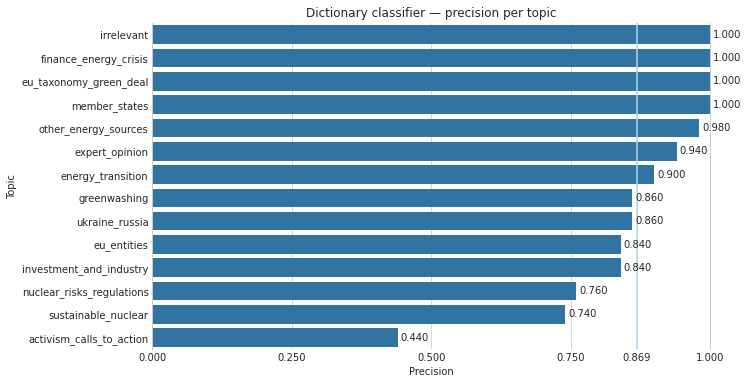

In [ ]:
plot_precision_scores(topics)

# Second iteration of classification

In [6]:
# loading the dataset containing the tweets and metadate in the network graph

df_2 = pd.read_pickle('../Data/df_tweets_selected_users.p')

In [ ]:
df_2 = df_2.reset_index()

In [ ]:
df_2 = df_2.drop(['index'],axis=1)

df_2.head()

,user.id,user.name,user.screen_name,id,created_at,favorite_count,retweet_count,text,mentions,retweeted,category,collapsed_category
0,962820603995672577,Eduard Heger,eduardheger,1480502771250049028,2022-01-10 11:32:21+00:00,20,8,Congratulations to @MinPres Rutte &amp; his 4t...,"[MinPres, NATO]",NaN,prime_ministers,politicians
1,962820603995672577,Eduard Heger,eduardheger,1470485614252466179,2021-12-13 20:07:45+00:00,60,18,Ahead of the V4-France Summit I talked to @Emm...,"[EmmanuelMacron, Europe2022FR]",NaN,prime_ministers,politicians
2,1498076587,ECR Party,ECRparty,1263448354287235076,2020-05-21 12:35:36+00:00,0,0,“The only way to achieve energy independence i...,[],NaN,europarties,meps & europarties
3,1498076587,ECR Party,ECRparty,1262293314033856513,2020-05-18 08:05:52+00:00,5,2,Swedish MEP @JessicaStegrud has written in @Ne...,"[JessicaStegrud, New_Europe]",NaN,europarties,meps & europarties
4,2152547844,ECPM,ECPM_official,790917675241369600,2016-10-25 14:07:22+00:00,0,0,#ECPM MEP @BasBelderMEP points out important o...,[BasBelderMEP],NaN,europarties,meps & europarties


In [ ]:
len(df_2)

7938

In [ ]:
# make a list of all tweets in the dataset
s_tweets_2 = df_2['text'].tolist()

In [ ]:
import regex as re

In [ ]:
# Define RegEx patterns for cleaning
twitter_pattern = r'@[a-zA-Z0-9_]{1,16}'                 # Remove twitter handles
retweet_pattern = r'RT'                                  # Remove retweet indicators
short_URL_pattern = r'https:\/\/t\.co\/[a-zA-Z0-9\-\.]+' # Remove shortened "https://t.co/..." Twitter URLs
other_URL_pattern = r'https:\/\/[A-z0-9?\.\/-_=!]+'      # Remove other URLs

pattern_list = [
    twitter_pattern,
    retweet_pattern,
    short_URL_pattern,
    other_URL_pattern
    ]

# Apply patterns to list of tweets
for i in range(0,len(s_tweets_2)):
    for pattern in pattern_list:
        s_tweets_2[i] = re.sub(pattern, '',s_tweets_2[i])

In [ ]:
# Make a DataFrame with all the cleaned tweets
df_categorized= pd.DataFrame(s_tweets_2, columns=['tweet'])


In [ ]:
# Apply the categorization function to the DataFrame
df_categorized = df_categorized['tweet'].apply(lambda x : classify_tweet(x, custom_terms_v2))

In [ ]:
# Expand the categories to their own proper column in the DataFrame
df_categorized = pd.DataFrame.from_records(df_categorized)

In [ ]:
df_categorized.head()

,sustainable_nuclear,eu_taxonomy_green_deal,energy_transition,finance_energy_crisis,greenwashing,eu_entities,nuclear_risks_regulations,ukraine_russia,investment_and_industry,expert_opinion,activism_calls_to_action,other_energy_sources,member_states,irrelevant
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
# Add column with tweets that haven't been classified
df_categorized['unclassified'] = 0

df_categorized.loc[df_categorized.sum(axis = 1, numeric_only = True) == 0, ['unclassified']] = 1

In [ ]:
len(df_categorized)

7938

In [ ]:
# join the DataFrame with metadata with the DataFrame with tweet categories
df_2 =df_2.join(df_categorized)

df_2.head(5)

,user.id,user.name,user.screen_name,id,created_at,favorite_count,retweet_count,text,mentions,retweeted,...,eu_entities,nuclear_risks_regulations,ukraine_russia,investment_and_industry,expert_opinion,activism_calls_to_action,other_energy_sources,member_states,irrelevant,unclassified
0,962820603995672577,Eduard Heger,eduardheger,1480502771250049028,2022-01-10 11:32:21+00:00,20,8,Congratulations to @MinPres Rutte &amp; his 4t...,"[MinPres, NATO]",NaN,...,0,0,0,0,0,0,0,0,0,0
1,962820603995672577,Eduard Heger,eduardheger,1470485614252466179,2021-12-13 20:07:45+00:00,60,18,Ahead of the V4-France Summit I talked to @Emm...,"[EmmanuelMacron, Europe2022FR]",NaN,...,1,0,0,0,0,0,0,1,0,0
2,1498076587,ECR Party,ECRparty,1263448354287235076,2020-05-21 12:35:36+00:00,0,0,“The only way to achieve energy independence i...,[],NaN,...,1,0,1,0,0,0,0,0,0,0
3,1498076587,ECR Party,ECRparty,1262293314033856513,2020-05-18 08:05:52+00:00,5,2,Swedish MEP @JessicaStegrud has written in @Ne...,"[JessicaStegrud, New_Europe]",NaN,...,1,0,0,0,0,0,0,1,0,0
4,2152547844,ECPM,ECPM_official,790917675241369600,2016-10-25 14:07:22+00:00,0,0,#ECPM MEP @BasBelderMEP points out important o...,[BasBelderMEP],NaN,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
# create datatime variable using the created_at string from the metadata

import datetime

def short_date(x):
    return datetime.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S%z').strftime('%Y-%m-%d')


In [ ]:
# apply the datetime function and delete the created_at varaible, as .xlsx can't contain timezone data
df_2['date'] = df_2['created_at'].apply(short_date)

df_2 = df_2.drop(['created_at'], axis=1)

df_2.head(5)

,user.id,user.name,user.screen_name,id,favorite_count,retweet_count,text,mentions,retweeted,category,...,nuclear_risks_regulations,ukraine_russia,investment_and_industry,expert_opinion,activism_calls_to_action,other_energy_sources,member_states,irrelevant,unclassified,date
0,962820603995672577,Eduard Heger,eduardheger,1480502771250049028,20,8,Congratulations to @MinPres Rutte &amp; his 4t...,"[MinPres, NATO]",NaN,prime_ministers,...,0,0,0,0,0,0,0,0,0,2022-01-10
1,962820603995672577,Eduard Heger,eduardheger,1470485614252466179,60,18,Ahead of the V4-France Summit I talked to @Emm...,"[EmmanuelMacron, Europe2022FR]",NaN,prime_ministers,...,0,0,0,0,0,0,1,0,0,2021-12-13
2,1498076587,ECR Party,ECRparty,1263448354287235076,0,0,“The only way to achieve energy independence i...,[],NaN,europarties,...,0,1,0,0,0,0,0,0,0,2020-05-21
3,1498076587,ECR Party,ECRparty,1262293314033856513,5,2,Swedish MEP @JessicaStegrud has written in @Ne...,"[JessicaStegrud, New_Europe]",NaN,europarties,...,0,0,0,0,0,0,1,0,0,2020-05-18
4,2152547844,ECPM,ECPM_official,790917675241369600,0,0,#ECPM MEP @BasBelderMEP points out important o...,[BasBelderMEP],NaN,europarties,...,0,0,0,0,0,0,0,1,0,2016-10-25


In [ ]:
len(df_2)

7938

In [ ]:
df_2.to_excel('classified_tweets_v4.xlsx')

In [ ]:
topic_dist_2 = df_2.sum(numeric_only = True).sort_values(ascending = True)[:-4]
topic_dist_2

sustainable_nuclear           174
expert_opinion                252
greenwashing                  373
nuclear_risks_regulations     533
activism_calls_to_action      538
irrelevant                    798
unclassified                  822
finance_energy_crisis         856
eu_entities                  1289
ukraine_russia               1314
eu_taxonomy_green_deal       1666
energy_transition            1774
investment_and_industry      1798
member_states                1809
other_energy_sources         2131
dtype: int64

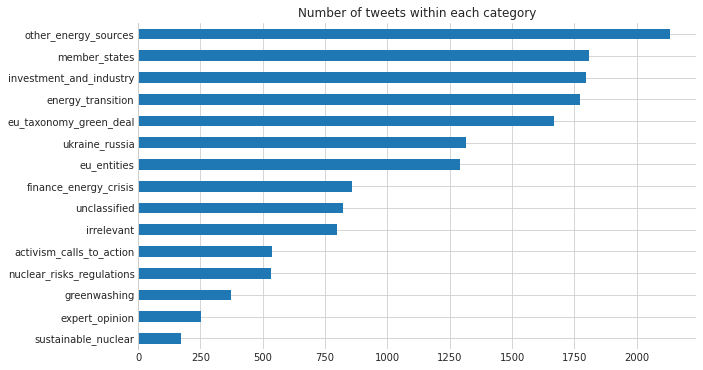

In [ ]:
plt.figure(figsize = (10,6))
topic_dist_2.plot(kind = 'barh')
plt.title('Number of tweets within each category')
sns.despine(bottom = True)

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=83a05b10-68f2-47cd-90b2-acf816447dd2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>